<a href="https://colab.research.google.com/github/ashia-002/python-oop-pandas-numpy/blob/main/Data_Exploration02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving merged_pigeon_disease_synthetic.csv to merged_pigeon_disease_synthetic (3).csv


### Convert CSV into dataframe

In [ ]:
import pandas as pd
df = pd.read_csv('merged_pigeon_disease_synthetic.csv')
df.head()

,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
0,Adult,Winter,Modern,Semi-scavenging,Regular,Tubewell,Good,1,Irregular,Irregular,NaN,Coccidiosis
1,Adult,Winter,Modern,Semi-scavenging,Irregular,Tubewell,Good,0,NaN,NaN,NaN,Strongyloidiasis
2,Adult,Rainy,Modern,Intensive,Regular,Other,Medium,0,Regular,Irregular,NaN,Salmonella
3,Adult,Summer,Modern,Scavenging,NaN,Tubewell,Poor,1,Irregular,Regular,Village Doctor,Strongyloidiasis
4,Young,Winter,Modern,Semi-scavenging,Regular,Tap,Poor,1,Irregular,Irregular,Village Doctor,ND


### See the shape of the data

In [ ]:
df.shape

(723, 12)

### Here the data is too few so we have to extend it based on the data

In [ ]:
pip install sdv

In [ ]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer
import pandas as pd
import os

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# Optional: Save metadata (delete existing first if needed)
metadata_path = "pigeon_metadata.json"
if os.path.exists(metadata_path):
    os.remove(metadata_path)
metadata.save_to_json(metadata_path)

# Step 3: Create and train the CTGAN model
model = CTGANSynthesizer(metadata)
model.fit(df)

# Step 4: Generate synthetic data
synthetic_data = model.sample(5000)

# Step 5: Combine original and synthetic data
ex_df = pd.concat([df, synthetic_data], ignore_index=True)

print(ex_df.shape)
ex_df.head()


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:167: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


(5723, 12)


,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
0,Adult,Winter,Modern,Semi-scavenging,Regular,Tubewell,Good,1,Irregular,Irregular,NaN,Coccidiosis
1,Adult,Winter,Modern,Semi-scavenging,Irregular,Tubewell,Good,0,NaN,NaN,NaN,Strongyloidiasis
2,Adult,Rainy,Modern,Intensive,Regular,Other,Medium,0,Regular,Irregular,NaN,Salmonella
3,Adult,Summer,Modern,Scavenging,NaN,Tubewell,Poor,1,Irregular,Regular,Village Doctor,Strongyloidiasis
4,Young,Winter,Modern,Semi-scavenging,Regular,Tap,Poor,1,Irregular,Irregular,Village Doctor,ND


In [ ]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             5723 non-null   object
 1   Season          5723 non-null   object
 2   Housing         5723 non-null   object
 3   Rearing         5723 non-null   object
 4   Cleaning        3430 non-null   object
 5   Water           5723 non-null   object
 6   FeedQuality     5723 non-null   object
 7   FeedSupplement  5723 non-null   int64 
 8   Vaccination     3902 non-null   object
 9   Deworming       3671 non-null   object
 10  Treatment       4078 non-null   object
 11  Disease         5723 non-null   object
dtypes: int64(1), object(11)
memory usage: 536.7+ KB


In [ ]:
ex_df.describe()

,FeedSupplement
count,5723.000000
mean,0.484886
std,0.499815
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### Check the missing values

In [ ]:
ex_df.isnull().sum()

,0
Age,0
Season,0
Housing,0
Rearing,0
Cleaning,2293
Water,0
FeedQuality,0
FeedSupplement,0
Vaccination,1821
Deworming,2052


### check for duplicates in each rows

In [ ]:
duplicated_rows = ex_df[ex_df.duplicated()]
print(f'Number of duplicated rows: {len(duplicated_rows)}\n')
#print(duplicated_rows)

duplicate_counts = ex_df.value_counts()
duplicate_counts[duplicate_counts > 1]


Number of duplicated rows: 48



Age    Season  Housing      Rearing          Cleaning   Water     FeedQuality  FeedSupplement  Vaccination  Deworming  Treatment       Disease         
Young  Summer  Traditional  Intensive        Irregular  Other     Poor         0               Irregular    Regular    Vet             Salmonella          2
Adult  Winter  Modern       Scavenging       Irregular  Other     Medium       1               Regular      Irregular  Vet             Salmonella          2
Young  Rainy   Modern       Semi-scavenging  Regular    Tap       Poor         0               Irregular    Regular    Vet             Strongyloidiasis    2
       Winter  Modern       Scavenging       Irregular  Tap       Poor         0               Irregular    Regular    Vet             Coccidiosis         2
                                                        Other     Poor         1               Irregular    Regular    Vet             Salmonella          2
                                                        Tubewell  Poor         0               Irregular    Irregular  Vet             Salmonella          2
Adult  Summer  Traditional  Semi-scavenging  Irregular  Other     Poor         1               Regular      Regular    Village Doctor  ND                  2
                            Scavenging       Irregular  Other     Medium       0               Regular      Regular    Village Doctor  Salmonella          2
Young  Summer  Traditional  Semi-scavenging  Regular    Other     Medium       1               Irregular    Irregular  Village Doctor  CRD                 2
Name: count, dtype: int64

Number of duplicates per **Disease**

In [ ]:
df[df.duplicated(subset=df.columns.difference(['Disease']), keep=False)]


,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
159,Young,Winter,Modern,Scavenging,Irregular,Tubewell,Poor,0,Irregular,Irregular,Vet,Salmonella
200,Young,Rainy,Traditional,Scavenging,NaN,Tap,Poor,1,Regular,NaN,Village Doctor,CRD
222,Young,Winter,Traditional,Intensive,Regular,Other,Poor,1,NaN,Regular,Village Doctor,Strongyloidiasis
234,Adult,Summer,Modern,Intensive,Irregular,Tubewell,Medium,1,Regular,Regular,Village Doctor,Coccidiosis
330,Adult,Summer,Traditional,Semi-scavenging,Irregular,Tap,Good,1,Irregular,NaN,Vet,Coccidiosis
360,Adult,Summer,Traditional,Semi-scavenging,Irregular,Tap,Good,1,Irregular,NaN,Vet,Strongyloidiasis
440,Adult,Winter,Traditional,Intensive,NaN,Other,Poor,0,Irregular,Regular,Vet,Coccidiosis
473,Adult,Summer,Modern,Intensive,Irregular,Tubewell,Medium,1,Regular,Regular,Village Doctor,Pigeon Pox
481,Young,Winter,Traditional,Intensive,Regular,Other,Poor,1,NaN,Regular,Village Doctor,Coccidiosis
644,Adult,Winter,Traditional,Intensive,NaN,Other,Poor,0,Irregular,Regular,Vet,Strongyloidiasis


### Droping all duplicated Sums

In [ ]:
df = ex_df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5675, 12)

### Droping the column Treatment

In [ ]:
df = df.drop(columns=['Treatment'])

### Filling the missing values using mode

In [ ]:
df['Cleaning'].fillna(df['Cleaning'].mode()[0], inplace=True)
df['Vaccination'].fillna(df['Vaccination'].mode()[0], inplace=True)
df['Deworming'].fillna(df['Deworming'].mode()[0], inplace=True)

/tmp/ipython-input-2862558532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cleaning'].fillna(df['Cleaning'].mode()[0], inplace=True)
/tmp/ipython-input-2862558532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
for col in df.columns:
  print(df[col].value_counts(normalize=True))

Age
Adult    0.57163
Young    0.42837
Name: proportion, dtype: float64
Season
Summer    0.381322
Rainy     0.320352
Winter    0.298326
Name: proportion, dtype: float64
Housing
Modern         0.508018
Traditional    0.491982
Name: proportion, dtype: float64
Rearing
Scavenging         0.369339
Semi-scavenging    0.348722
Intensive          0.281938
Name: proportion, dtype: float64
Cleaning
Irregular    0.743612
Regular      0.256388
Name: proportion, dtype: float64
Water
Other       0.383612
Tap         0.364758
Tubewell    0.251630
Name: proportion, dtype: float64
FeedQuality
Medium    0.37304
Poor      0.35348
Good      0.27348
Name: proportion, dtype: float64
FeedSupplement
0    0.514361
1    0.485639
Name: proportion, dtype: float64
Vaccination
Irregular    0.685991
Regular      0.314009
Name: proportion, dtype: float64
Deworming
Irregular    0.697269
Regular      0.302731
Name: proportion, dtype: float64
Disease
Coccidiosis         0.158943
Strongyloidiasis    0.153833
Salmonella   

In [ ]:
df.isnull().sum() #no missing values

,0
Age,0
Season,0
Housing,0
Rearing,0
Cleaning,0
Water,0
FeedQuality,0
FeedSupplement,0
Vaccination,0
Deworming,0


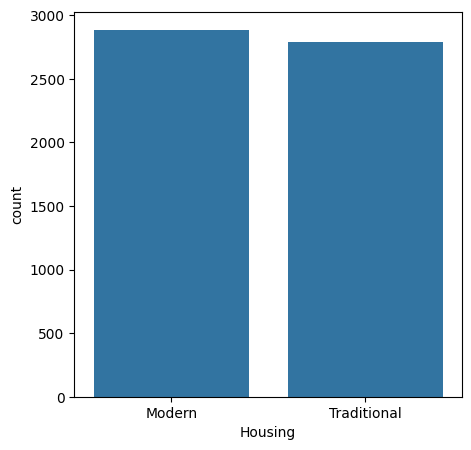

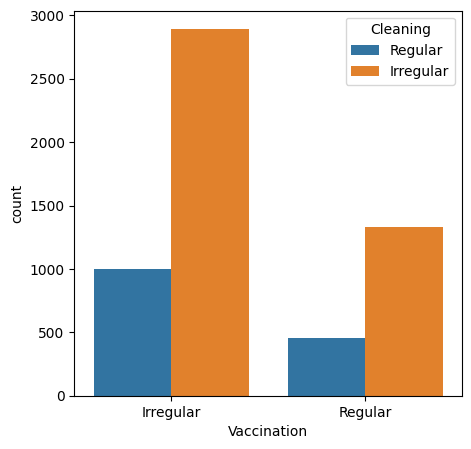

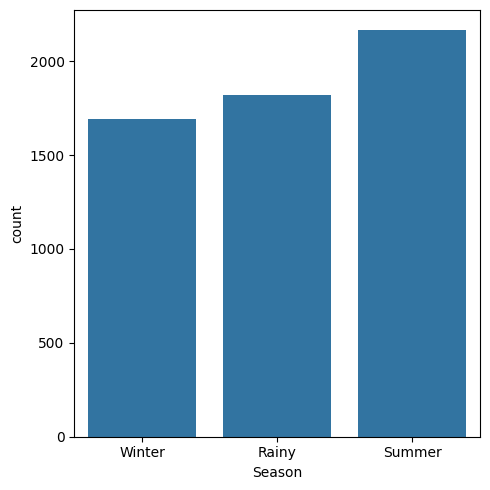

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Housing distribution
plt.figure(figsize=(5,5))
sns.countplot(x="Housing", data=df)
plt.show()

# Vaccination vs Cleaning practices
plt.figure(figsize=(5,5))
sns.countplot(x="Vaccination", hue="Cleaning", data=df)
plt.show()

# Feeding quality distribution
plt.figure(figsize=(5,5))
sns.countplot(x="Season", data=df)
plt.tight_layout()
plt.show()


### Checking Target class balance

In [ ]:
print(df['Disease'].value_counts(normalize=True))
print(df['Deworming'].value_counts(normalize=True))

Disease
Coccidiosis         0.158943
Strongyloidiasis    0.153833
Salmonella          0.153480
CRD                 0.153304
ND                  0.132863
Ascariasis          0.128634
Pigeon Pox          0.118943
Name: proportion, dtype: float64
Deworming
Irregular    0.697269
Regular      0.302731
Name: proportion, dtype: float64


### Distribution of diseases

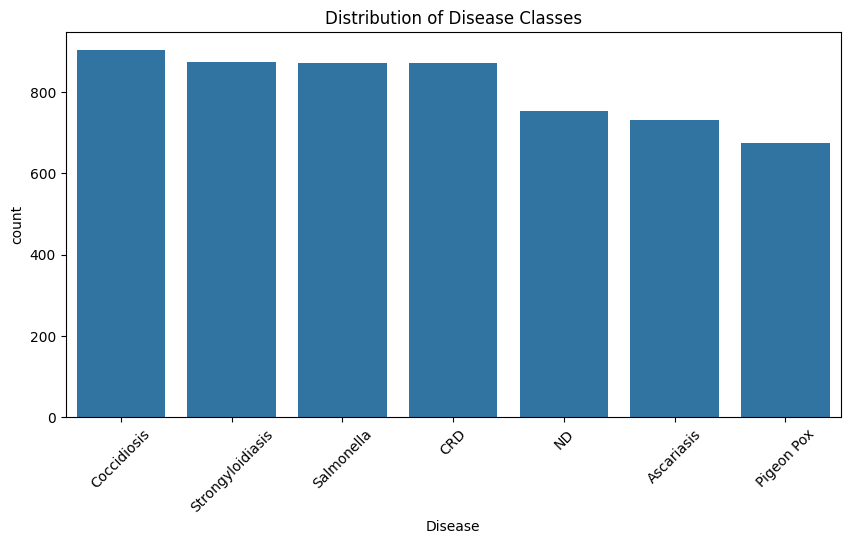

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Disease', order=df['Disease'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Disease Classes')
plt.show()

### converting all categorical values into numerical

For input features (X)

In [ ]:
x = df.drop(columns=['Disease'])
x_encoded = pd.get_dummies(x, drop_first=True) #Binary columns (0/1)

In [ ]:
x_encoded.head()

,FeedSupplement,Age_Young,Season_Summer,Season_Winter,Housing_Traditional,Rearing_Scavenging,Rearing_Semi-scavenging,Cleaning_Regular,Water_Tap,Water_Tubewell,FeedQuality_Medium,FeedQuality_Poor,Vaccination_Regular,Deworming_Regular
0,1,False,False,True,False,False,True,True,False,True,False,False,False,False
1,0,False,False,True,False,False,True,False,False,True,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,True,False,True,False
3,1,False,True,False,False,True,False,False,False,True,False,True,False,True
4,1,True,False,True,False,False,True,True,True,False,False,True,False,False


For the target column (y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

y = df['Disease']
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y) #Integer labels (0, 1, 2, ...)

In [ ]:
y_encoded

array([2, 6, 5, ..., 0, 4, 1])

### Train Test Splits

In [ ]:
from re import X
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
)

In [ ]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts(normalize=True))
print("y_test distribution:\n", pd.Series(y_test).value_counts(normalize=True))


X_train shape: (4540, 14)
X_test shape: (1135, 14)
y_train distribution:
 2    0.157048
6    0.156608
1    0.155066
5    0.151542
3    0.133040
0    0.125991
4    0.120705
Name: proportion, dtype: float64
y_test distribution:
 2    0.166520
5    0.161233
1    0.146256
6    0.142731
0    0.139207
3    0.132159
4    0.111894
Name: proportion, dtype: float64


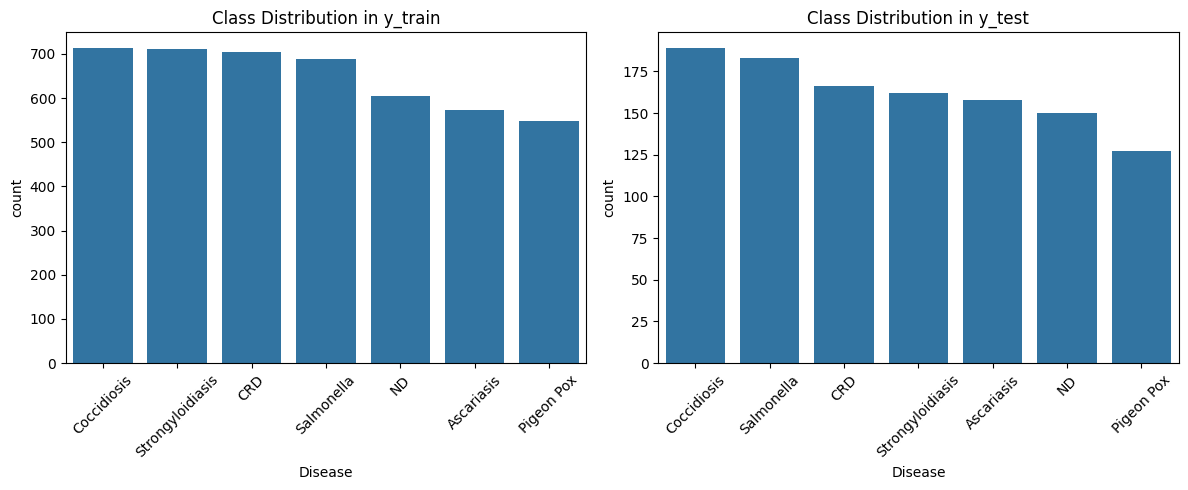

In [ ]:

# Convert to Series with original class names (optional, if you used LabelEncoder)
y_train_labels = pd.Series(y_encoder.inverse_transform(y_train), name="Disease")
y_test_labels = pd.Series(y_encoder.inverse_transform(y_test), name="Disease")

# Plot
plt.figure(figsize=(12, 5))

# Train distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_labels, order=y_train_labels.value_counts().index)
plt.title("Class Distribution in y_train")
plt.xticks(rotation=45)

# Test distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test_labels, order=y_test_labels.value_counts().index)
plt.title("Class Distribution in y_test")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Train the model (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf_model.predict(x_test)

### Evaluate the model

Accuracy: 0.13656387665198239

Classification Report:

                  precision    recall  f1-score   support

      Ascariasis       0.15      0.13      0.14       158
             CRD       0.13      0.14      0.14       166
     Coccidiosis       0.14      0.13      0.14       189
              ND       0.15      0.15      0.15       150
      Pigeon Pox       0.12      0.13      0.12       127
      Salmonella       0.17      0.15      0.16       183
Strongyloidiasis       0.10      0.12      0.11       162

        accuracy                           0.14      1135
       macro avg       0.14      0.14      0.14      1135
    weighted avg       0.14      0.14      0.14      1135



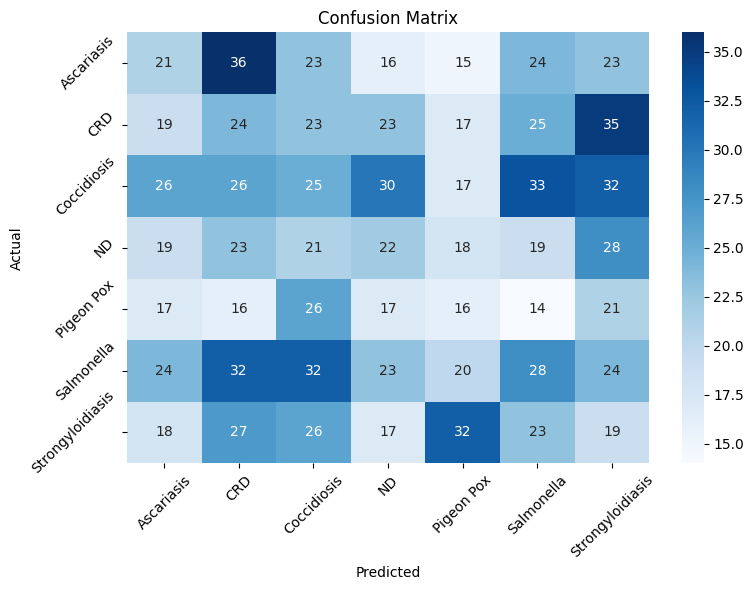

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_encoder.classes_,
            yticklabels=y_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


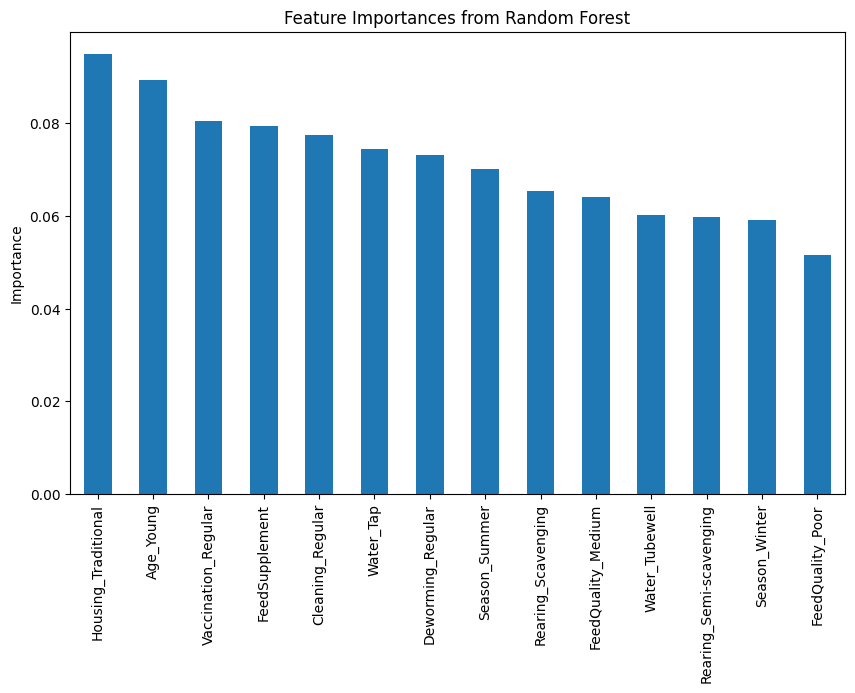

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = x_train.columns  # or list of feature names

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [None, 10, 20],         # Maximum tree depth
    'min_samples_split': [2, 5],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2],          # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2', None]     # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,              # 3-fold cross-validation
    n_jobs=-1,         # Use all cores
    verbose=2,
    scoring='f1_macro' # You can choose 'accuracy' or other metrics too
)

# Fit on training data
grid_search.fit(x_train, y_train)

# Best params
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.1356828193832599
              precision    recall  f1-score   support

           0       0.11      0.09      0.10       158
           1       0.12      0.14      0.13       166
           2       0.14      0.14      0.14       189
           3       0.15      0.14      0.14       150
           4       0.15      0.13      0.14       127
           5       0.17      0.17      0.17       183
           6       0.11      0.14      0.12       162

    accuracy                           0.14      1135
   macro avg       0.14      0.13      0.13      1135
weighted avg       0.14      0.14      0.14      1135



### Training XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:26:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.13656387665198239
              precision    recall  f1-score   support

           0       0.12      0.09      0.11       158
           1       0.14      0.17      0.16       166
           2       0.18      0.19      0.18       189
           3       0.07      0.06      0.07       150
           4       0.12      0.09      0.10       127
           5       0.14      0.16      0.15       183
           6       0.14      0.16      0.15       162

    accuracy                           0.14      1135
   macro avg       0.13      0.13      0.13      1135
weighted avg       0.13      0.14      0.13      1135



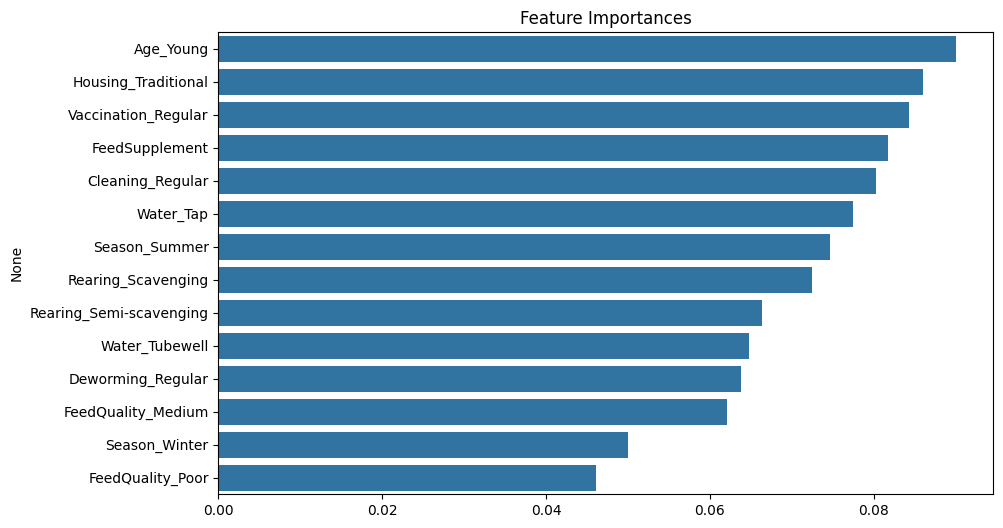

In [ ]:
importances = best_rf.feature_importances_
features = x_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title("Feature Importances")
plt.show()

### Feature Engineering and training XGBoost again

In [ ]:
# Hygiene Level = Cleaning + Vaccination score
cleaning_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
vaccination_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
deworming_map = {'None': 0, 'Irregular': 1, 'Regular': 2}
rearing_map = {'Scavenging': 0, 'Semi-scavenging': 1, 'Intensive': 2}

df['Cleaning_Score'] = df['Cleaning'].map(cleaning_map)
df['Vaccination_Score'] = df['Vaccination'].map(vaccination_map)
df['Deworming_Score'] = df['Deworming'].map(deworming_map)
df['Rearing_Score'] = df['Rearing'].map(rearing_map)

df['Hygiene_Level'] = df['Cleaning_Score'] + df['Vaccination_Score']
df['Total_Preventive_Care'] = df['Cleaning_Score'] + df['Vaccination_Score'] + df['Deworming_Score'] + df['FeedSupplement']
df['Housing_Season'] = df['Housing'] + "_" + df['Season']


In [ ]:
# Drop intermediate numeric columns (optional, they were only used to compute scores)
df.drop(columns=['Cleaning_Score', 'Vaccination_Score', 'Deworming_Score'], inplace=True)

# Separate features and target
X = df.drop(columns=['Disease'])
y = df['Disease']

# Label encode the target
from sklearn.preprocessing import LabelEncoder
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
X_encoded.head()

,FeedSupplement,Rearing_Score,Hygiene_Level,Total_Preventive_Care,Age_Young,Season_Summer,Season_Winter,Housing_Traditional,Rearing_Scavenging,Rearing_Semi-scavenging,...,Water_Tubewell,FeedQuality_Medium,FeedQuality_Poor,Vaccination_Regular,Deworming_Regular,Housing_Season_Modern_Summer,Housing_Season_Modern_Winter,Housing_Season_Traditional_Rainy,Housing_Season_Traditional_Summer,Housing_Season_Traditional_Winter
0,1,1,3,5,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
1,0,1,2,3,False,False,True,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,0,2,4,5,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,1,0,2,5,False,True,False,False,True,False,...,True,False,True,False,True,True,False,False,False,False
4,1,1,3,5,True,False,True,False,False,True,...,False,False,True,False,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=y_encoder.classes_))


Accuracy: 0.12863436123348018
                  precision    recall  f1-score   support

      Ascariasis       0.10      0.09      0.09       146
             CRD       0.15      0.14      0.15       174
     Coccidiosis       0.17      0.19      0.18       180
              ND       0.12      0.12      0.12       151
      Pigeon Pox       0.11      0.10      0.10       135
      Salmonella       0.12      0.13      0.12       174
Strongyloidiasis       0.11      0.12      0.12       175

        accuracy                           0.13      1135
       macro avg       0.13      0.13      0.13      1135
    weighted avg       0.13      0.13      0.13      1135



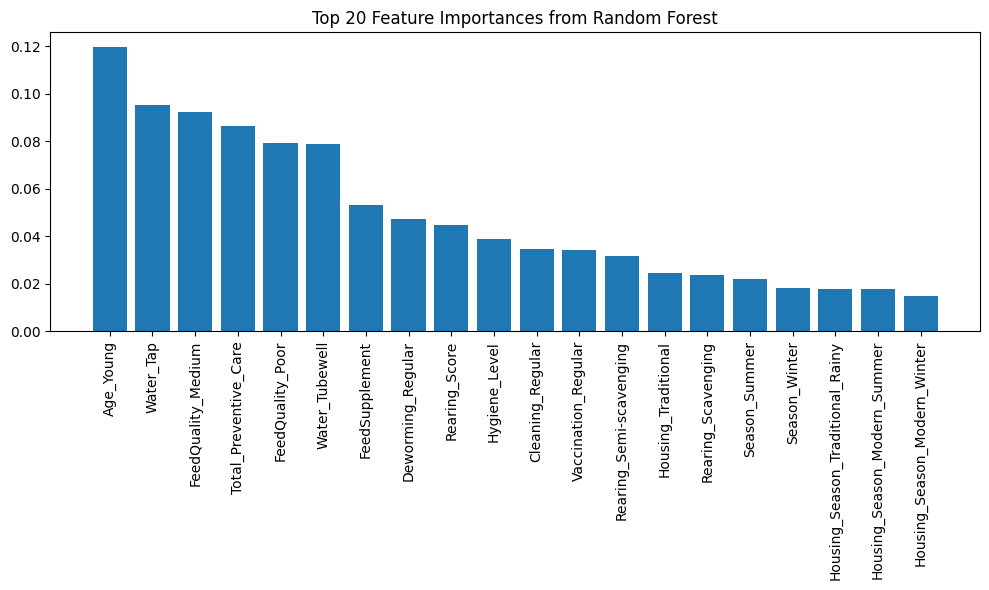

In [ ]:
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances from Random Forest")
plt.bar(range(20), importances[indices][:20], align="center")
plt.xticks(range(20), feature_names[indices][:20], rotation=90)
plt.tight_layout()
plt.show()
